In [51]:
import os

print(os.getcwd())
os.chdir(r"d:\GyanPrakashKuswaha\GenAI\InternOps")
print(os.getcwd())

d:\GyanPrakashKuswaha\GenAI\InternOps
d:\GyanPrakashKuswaha\GenAI\InternOps


In [52]:
# from langchain_community.document_loaders.pdf import PyPDFLoader
from langchain_community.document_loaders.pdf import PyPDFLoader
from langchain_community.document_loaders import TextLoader

In [ ]:
loader = PyPDFLoader(
    file_path="jd_and_resume/resume.pdf"
)

In [54]:
doc = loader.load()

In [55]:
print(doc[0].page_content)

Gyan Prakash Kushwaha
/githubGitHub| /linkedinLinkedIn| /gl⌢beKaggle| /envel⌢pegyanprakash.sde| ♂¶obile+91 9575765381
SUMMARY
AI Engineering Undergraduate (IIT Madras) with strong DSA fundamentals (200+ LeetCodeproblems). Experi-
enced in buildingagentic RAG workflowsand end-to-end ML systems usingLangGraph, FastAPI, and Vector
DBs. Proficient in reducing inference latency and deploying scalable AI solutions. Seeking an SDE/AI internship to
leverage skills in Generative AI and backend optimization.
EDUCATION
Indian Institute of Technology (IIT), MadrasChennai, Tamil Nadu
BS in Data Science and Applications; CGPA: 8.18/10 2023 – 2027
SKILLS
Programming Languages Python, JavaScript (ES6+), Java, SQL
Backend Frameworks Flask, FastAPI, Node.js
Frontend Technologies React, Vue.js, Bootstrap, Tailwind CSS
Databases & Storage Systems PostgreSQL, SQLite, DuckDB, Redis
Vector Databases & Search FAISS, ChromaDB
Machine Learning & NLP NumPy, Pandas, Scikit-learn, PyTorch, TensorFlow, NLTK
Data Vi

In [56]:
type(doc[1].page_content)

str

In [57]:
print(doc[1].page_content)

Movie Recommender System|Python, Scikit-Learn, Streamlit, Pandas Repo Link
–Developed a Content-Based Movie Recommender SystemusingPythonandStreamlit, processing a dataset
of4,800+ moviesto generate personalized top-10 viewing suggestions.
–Engineered a feature extraction pipelinewithPandasandScikit-Learn, transforming unstructured metadata
(genres, cast, crew) into a5,000-featureBag-of-Words model to calculateCosine Similarityscores.
–Deployed an interactive web applicationintegrating theTMDB APIto fetch real-time posters, utilizingPickle
serialization to optimize data loading and deliver recommendations efficiently.
ACHIEVEMENTS
•Kaggle Expert: Top 4% globally (Rank 341), 1 Silver & 9 Bronze medals; datasets with 22K+ views and 5.6K+
downloads
•LeetCode: Solved 219+ DSA problems (100+ Medium)
•HackerRank: 5⋆Gold Badge (SQL)


In [58]:
resume_text = """"""

for page in doc:
    resume_text += page.page_content + "\n"

print(resume_text)

Gyan Prakash Kushwaha
/githubGitHub| /linkedinLinkedIn| /gl⌢beKaggle| /envel⌢pegyanprakash.sde| ♂¶obile+91 9575765381
SUMMARY
AI Engineering Undergraduate (IIT Madras) with strong DSA fundamentals (200+ LeetCodeproblems). Experi-
enced in buildingagentic RAG workflowsand end-to-end ML systems usingLangGraph, FastAPI, and Vector
DBs. Proficient in reducing inference latency and deploying scalable AI solutions. Seeking an SDE/AI internship to
leverage skills in Generative AI and backend optimization.
EDUCATION
Indian Institute of Technology (IIT), MadrasChennai, Tamil Nadu
BS in Data Science and Applications; CGPA: 8.18/10 2023 – 2027
SKILLS
Programming Languages Python, JavaScript (ES6+), Java, SQL
Backend Frameworks Flask, FastAPI, Node.js
Frontend Technologies React, Vue.js, Bootstrap, Tailwind CSS
Databases & Storage Systems PostgreSQL, SQLite, DuckDB, Redis
Vector Databases & Search FAISS, ChromaDB
Machine Learning & NLP NumPy, Pandas, Scikit-learn, PyTorch, TensorFlow, NLTK
Data Vi

In [63]:
loader = TextLoader("jd_and_resume/jd.txt", encoding="utf-8")
document = loader.load()

In [64]:
jd = """"""
for doc in document:
    jd += doc.page_content + "\n"

print(jd)

Job Description
Job Title: Data Science & AI Intern  

Company: GEODISHA 

Location: Hyderabad - Onsite 

Duration: 1- 4 Months 

About GEODISHA 

At GEODISHA, we are at the forefront of Data Analytics and AI, leveraging data to solve  complex problems and drive innovation. Our team is a dedicated group of researchers, engineers,  and strategists who believe in the power of technology. We are passionately committed to  developing cutting-edge AI that is not only powerful but also ethical, transparent, and fair. We're  looking for the next generation of innovators to join us. 

The Opportunity: This Isn't Your Typical Internship 

We are seeking truly exceptional interns to join our core Data & AI team. This is a unique  opportunity to move beyond theory and apply your skills to high-impact, real-world challenges  across the full data lifecycle. 

You won't be on the sidelines. You'll be paired with a senior mentor and embedded directly into  projects at the intersection of data enginee

## LangGraph Workflow

In [65]:
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from dotenv import load_dotenv
load_dotenv()

True

In [66]:
## Structured Output
class MissingSkills(BaseModel):
    skill_name : list[str] = Field(..., description="The specific skill, tool, or technology missing from the resume.")
    importance: Literal['Critical', 'Bonus'] = Field(..., description="Critical if the JD lists it as a requirement; Bonus if listed as preferred/nice-to-have.")
    category : Literal["Technical", "Soft Skill", "Domain Knowledge", "Certification"] = Field(..., description="The category of the missing kill.")

class ResumeSkills(BaseModel):
    match_percentage: int = Field(..., ge=0, le=100, description="An integer score from 0 to 100 representing the fit.")
    missing_skills : list[MissingSkills] = Field(..., description="A list of skills found in the JD but missing or weak in the resume.")
    brief_summary: str = Field(..., description="A 1-sentence summary of why the score was given.")

In [67]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
extractor_llm = model.with_structured_output(ResumeSkills)

In [68]:
# State
class ResumeState(TypedDict):
    resume: str
    jd : str
    result: ResumeSkills

In [69]:
def llm(state: ResumeState):
    sys_message = SystemMessage(content= """
        You are an expert AI Resume Screener and Applicant Tracking System (ATS). Your job is to strictly compare a candidate's Resume against a Job Description (JD).
        **Your Analysis Rules:**
        1. **Be Objective:** Do not hallucinate skills that are not explicitly present or strongly implied in the resume.
        2. **Scoring:** >     * **90-100:** Perfect match (all hard requirements met).
        * **70-89:** Strong match (missing only minor/bonus skills).
        * **40-69:** Partial match (missing some critical hard skills).
        * **0-39:** Poor match (irrelevant background).


        3. **Missing Skills:** If a skill is mentioned in the JD as "Required" or "Must-have" and is not in the Resume, mark it as 'Critical'. If it is "Preferred" or "Plus", mark it as 'Bonus'.
        4. **Synonyms:** Be smart about synonyms (e.g., if JD asks for 'ReactJS' and Resume says 'React.js' or 'React', count it as a match).
                                """)
    
    human_message = HumanMessage(content= f"""
        Analyze the following Resume against the Job Description.
        **JOB DESCRIPTION:**
        {state["resume"]}
        **RESUME:**
        {state["jd"]}
                                 """)
    
    messages = [sys_message, human_message]
    response = extractor_llm.invoke(messages)
    
    return {"result": response}

In [70]:
# Graph
graph = StateGraph(ResumeState)

# Nodes
graph.add_node("llm", llm)

# Edges 
graph.add_edge(START, "llm")
graph.add_edge("llm", END)

workflow = graph.compile()

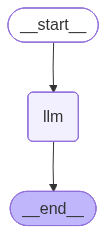

In [71]:
workflow

In [72]:
initialState = {
    "resume": resume_text,
    "jd": jd
}

final_state = workflow.invoke(initialState)

In [74]:
print(final_state['result'].model_dump())

{'match_percentage': 85, 'missing_skills': [{'skill_name': ['Behavioral Analytics', 'computational social science'], 'importance': 'Bonus', 'category': 'Domain Knowledge'}, {'skill_name': ['Responsible AI', 'ethics', 'algorithmic fairness'], 'importance': 'Bonus', 'category': 'Soft Skill'}], 'brief_summary': 'The candidate is a strong match, possessing excellent technical skills in AI/ML, GenAI, and data analytics, though they could articulate their interest in Responsible AI and Behavioral Analytics more explicitly as emphasized in the job description.'}
